In [1]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

#Grabbing the mushroom data
df = pd.read_csv("agaricus-lepiota (1)-Copy1.data")

#Figuring out which features that tells us the most about whether we can eat a mushroom or not
df1 = df.drop(['edibility'], axis=1) # dropping edibility since thats our y
mushrooms = pd.get_dummies(df1) # X
edibility = pd.get_dummies(df['edibility']) # y

#using PCA
pca = decomposition.PCA(n_components=3)
pca.fit(mushrooms)
Xpca = pca.transform(mushrooms)

### Silhouette coefficient (SC)

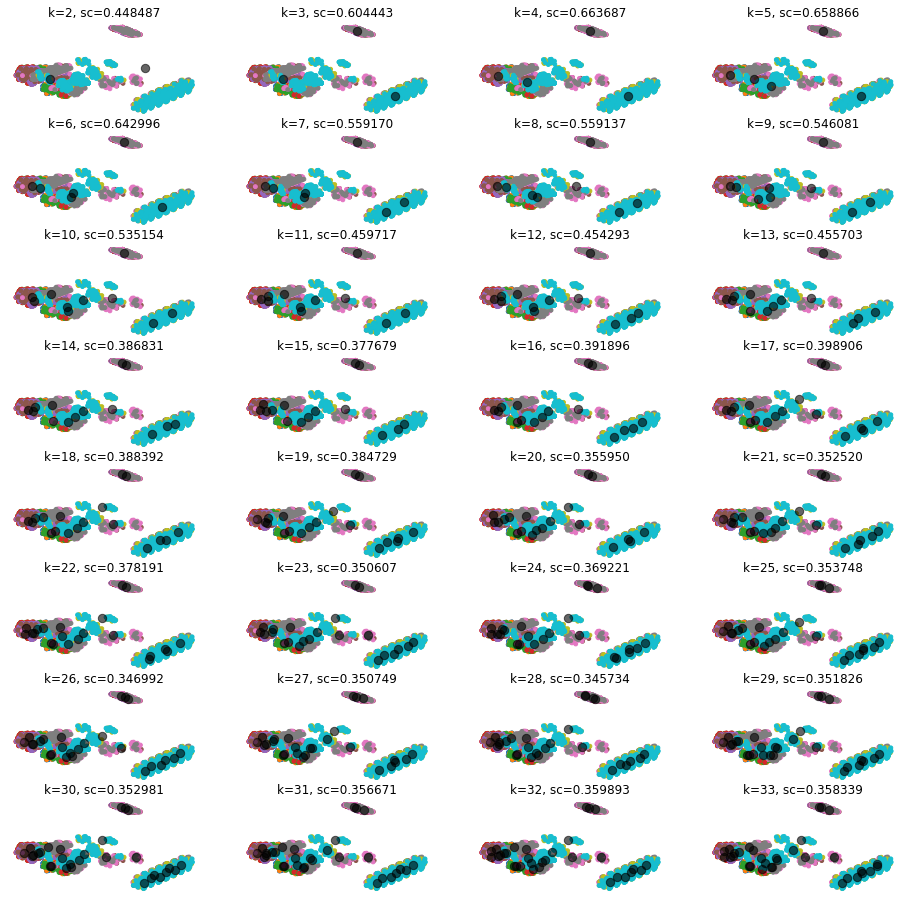

In [2]:
min_k, max_k = 2, 33
row, col = 8, 4

fig, axs = plt.subplots(row, col,figsize=(16, 16))
sc = [] #A higher SC means better clusters.

for n in range((1+max_k-min_k)):
    k = min_k + n
 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Xpca)
    y_kmeans = kmeans.predict(Xpca)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    sc.append(metrics.silhouette_score(Xpca, labels, metric='euclidean')) 
    
    # Adding subplots to figure
    subfigure = axs[math.floor(n/col), n%col]
    subfigure.scatter(Xpca[:, 0], Xpca[:, 1], c=edibility.index, s=15, cmap='tab10')
    subfigure.scatter(centers[:, 0], centers[:, 1], c='black', s=70, alpha=0.6);
    subfigure.set_title("k=%d, sc=%f"%(k,sc[-1]))
    subfigure.axis('off')

 ### Comparing the silhouette coefficient (sc) based on k value, and then find the value of k that gives the best value

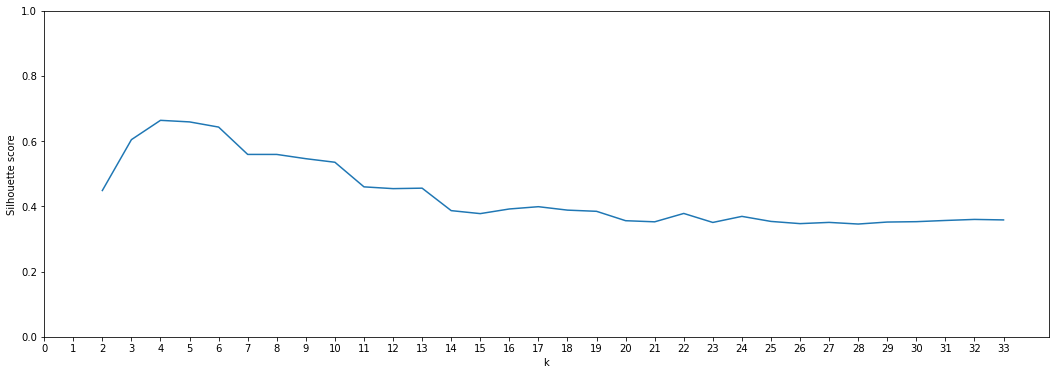

The optimal value fo k is: k=4, where sc=0.663687


In [3]:
fig=plt.figure(figsize=(18,6))
ax = plt.axes()
ax.set(ylim=(0, 1))
plt.plot(range(min_k, max_k+1), sc)
plt.xticks(range(0, max_k+1))
ax.set_xlabel("k")
ax.set_ylabel("Silhouette score")
plt.show()
print("The optimal value fo k is: k=%d, where sc=%f"%(sc.index(max(sc))+2, max(sc)))